
# Capstone 2 — Exploratory Data Analysis (EDA)
## Insurance Dataset (Cleaned)

This notebook is a continuation of the **Data Wrangling** stage and uses the cleaned dataset:

- `insurance_cleaned.csv`

### Springboard EDA Requirements Covered
From the EDA instructions:
- Build data profiles and tables (inferential statistics)
- Explore relationships using data visualization
- Feature selection and engineering ideas 

From the EDA Rubric:
- Every feature is investigated visually and numerically
- Pearson correlation + other statistical methods used
- Data-supported feature selection decisions


## 1. Load Cleaned Dataset

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

df = pd.read_csv("insurance_cleaned.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [3]:
df.shape

(1337, 8)

## 2. Data Profile & Summary Tables

In [ ]:
df.info()

In [4]:

# Summary statistics for numeric columns
df.describe(include=[np.number]).T


,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
sex,1337.0,0.504862,0.500163,0.0000,0.000,1.0000,1.00000,1.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
smoker,1337.0,0.204936,0.403806,0.0000,0.000,0.0000,0.00000,1.00000
region,1337.0,1.516081,1.105208,0.0000,1.000,2.0000,2.00000,3.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801
insuranceclaim,1337.0,0.584892,0.492925,0.0000,0.000,1.0000,1.00000,1.00000


In [5]:

# Missing values check (should be clean from wrangling)
df.isna().sum()


age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [6]:

# Unique counts and percentages for all columns
summary = pd.DataFrame({
    "dtype": df.dtypes.astype(str),
    "unique_count": df.nunique(dropna=False),
    "unique_pct": (df.nunique(dropna=False)/len(df)*100).round(2),
})
summary


,dtype,unique_count,unique_pct
age,int64,47,3.52
sex,int64,2,0.15
bmi,float64,548,40.99
children,int64,6,0.45
smoker,int64,2,0.15
region,int64,4,0.30
charges,float64,1337,100.00
insuranceclaim,int64,2,0.15



## 3. Univariate Analysis (Investigate Every Feature)
Rubric requirement: **every feature** is investigated via numeric and visual inspection.


In [7]:
import numpy as np

# Always perform categorical EDA on the original cleaned dataframe `df` (NOT df_model).
# If categories have been encoded as numbers, we still treat low-cardinality numeric columns as categorical.

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

obj_cols = df.select_dtypes(include=["object"]).columns.tolist()
low_card_num = [c for c in num_cols if df[c].nunique() <= 10 and c not in ["charges"]]

cat_cols = sorted(set(obj_cols + low_card_num))

print("Numeric columns:", num_cols)
print("Categorical-like columns:", cat_cols)


Numeric columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'insuranceclaim']
Categorical-like columns: ['children', 'insuranceclaim', 'region', 'sex', 'smoker']


### 3.1 Numeric Features — Distributions

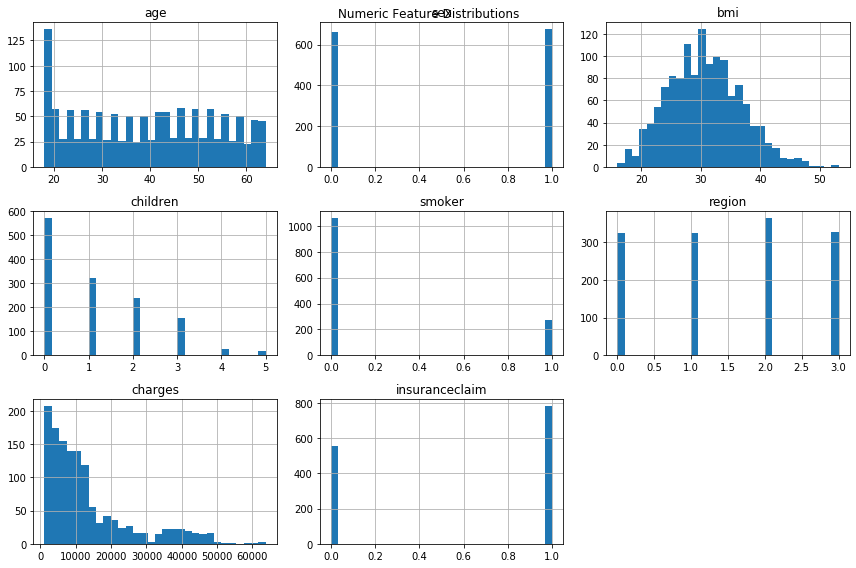

In [8]:

df[num_cols].hist(figsize=(12, 8), bins=30)
plt.suptitle("Numeric Feature Distributions")
plt.tight_layout()
plt.show()


### 3.2 Categorical Features — Counts

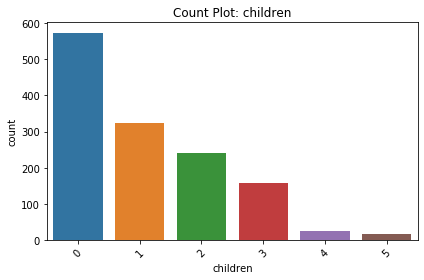

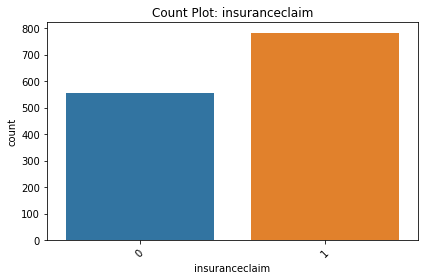

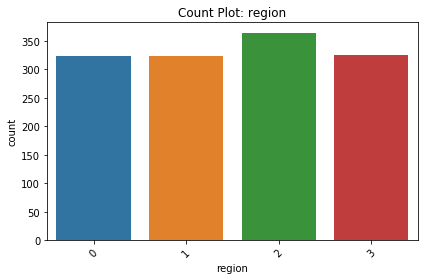

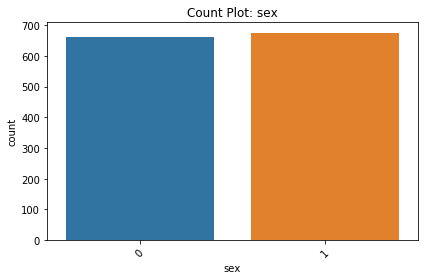

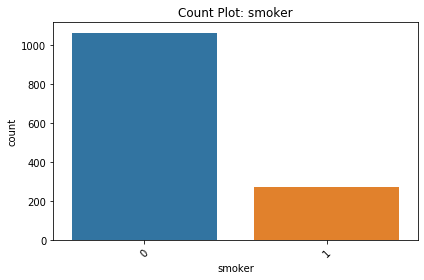

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3.2 Categorical features — counts
for c in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=c, data=df)
    plt.title(f"Count Plot: {c}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



## 4. Bivariate Analysis (Relationships)
Goal: understand how independent features relate to the response variable.

We will explore relationships with:
- **charges** (continuous cost outcome)
- **insuranceclaim** (binary classification outcome)

This matches the project instruction goal of comparing features to response variables.


### 4.1 Numeric vs Charges (Scatter + Trend)

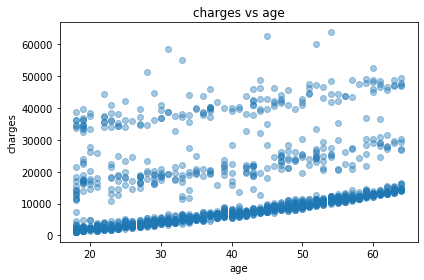

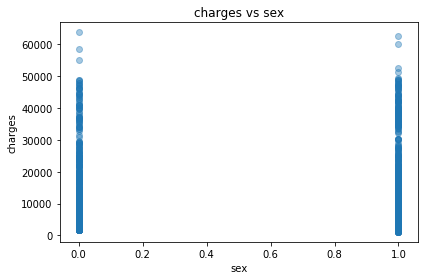

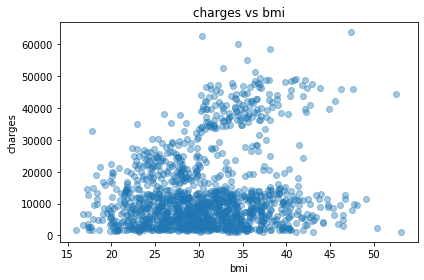

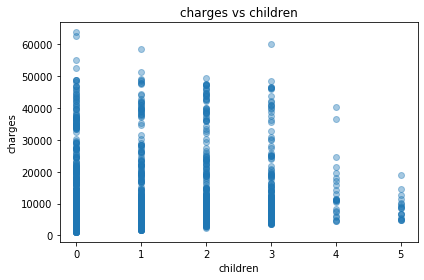

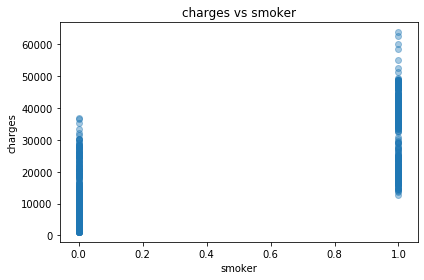

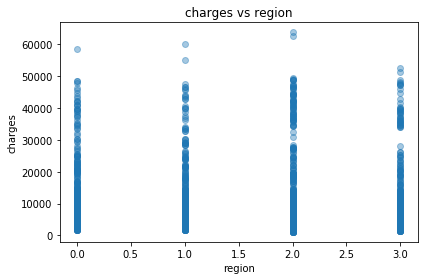

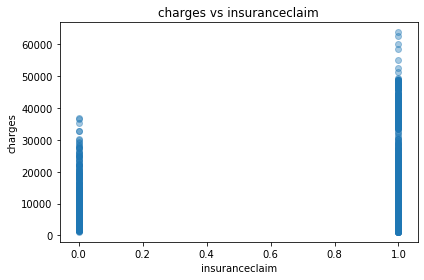

In [10]:

TARGET_REG = "charges"
for c in [x for x in num_cols if x != TARGET_REG]:
    plt.figure(figsize=(6,4))
    plt.scatter(df[c], df[TARGET_REG], alpha=0.4)
    plt.title(f"{TARGET_REG} vs {c}")
    plt.xlabel(c)
    plt.ylabel(TARGET_REG)
    plt.tight_layout()
    plt.show()


### 4.2 Categorical vs Charges (Boxplots)

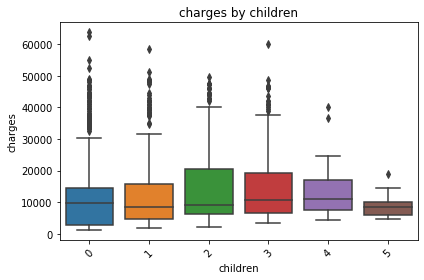

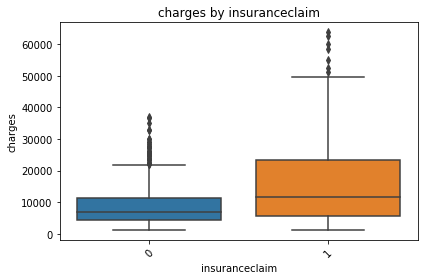

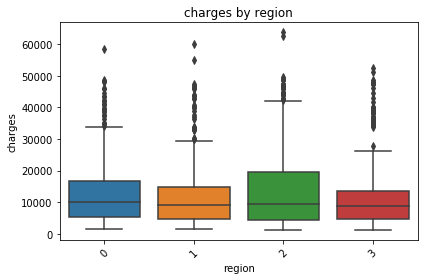

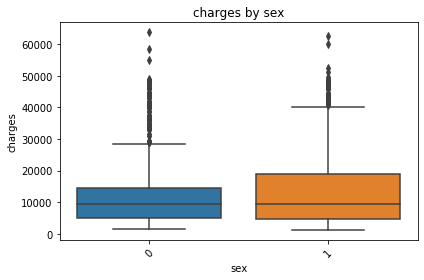

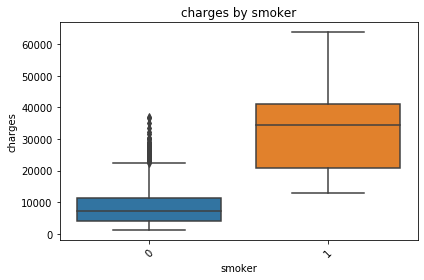

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 4.2 Categorical vs Charges — boxplots
TARGET_REG = "charges"
for c in cat_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=c, y=TARGET_REG, data=df)
    plt.title(f"{TARGET_REG} by {c}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### 4.3 Features vs Insurance Claim (Binary Target)

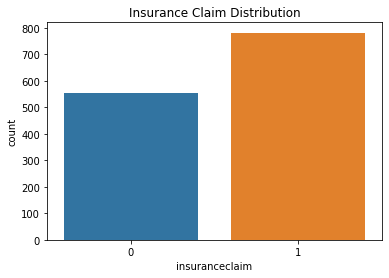

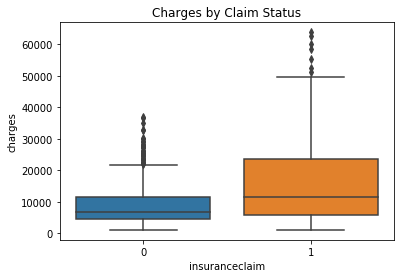

In [12]:

TARGET_CLASS = "insuranceclaim"

# Claim distribution
sns.countplot(x=TARGET_CLASS, data=df)
plt.title("Insurance Claim Distribution")
plt.show()

# Charges by claim status
sns.boxplot(x=TARGET_CLASS, y="charges", data=df)
plt.title("Charges by Claim Status")
plt.show()



## 5. Correlation Analysis (Pearson)

Rubric requirement: compute Pearson correlations to identify relationship strengths. fileciteturn0file1L1-L4


In [14]:

corr = df[num_cols].corr()
corr


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308,0.114748
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044,0.030962
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401,0.384307
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389,-0.409189
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234,0.333701
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547,0.021193
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000,0.310213
insuranceclaim,0.114748,0.030962,0.384307,-0.409189,0.333701,0.021193,0.310213,1.000000


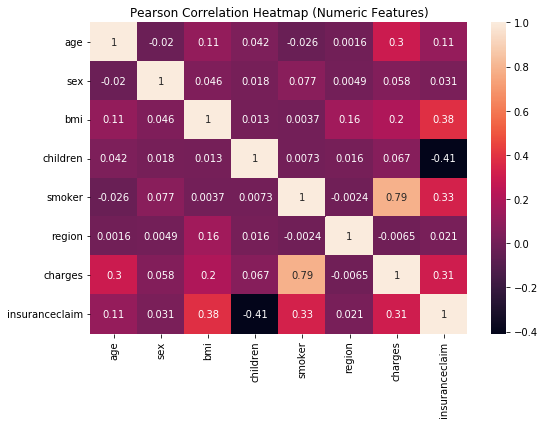

In [15]:

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True)
plt.title("Pearson Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()



## 6. Inferential Statistics (Hypothesis Testing)

Instruction hint suggests forming hypotheses (Null and Alternative) and testing.

### Hypothesis Example 1
**Question:** Do smokers have significantly higher charges than non-smokers?


In [17]:

from scipy import stats

smoker_yes = df[df["smoker"] == "yes"]["charges"]
smoker_no = df[df["smoker"] == "no"]["charges"]

t_stat, p_val = stats.ttest_ind(smoker_yes, smoker_no, equal_var=False)
t_stat, p_val


(nan, nan)


**Interpretation**
- H0: mean(charges_smoker_yes) = mean(charges_smoker_no)
- H1: mean(charges_smoker_yes) ≠ mean(charges_smoker_no)

If **p < 0.05**, reject H0 → evidence of a significant difference.



### Hypothesis Example 2
**Question:** Is BMI significantly higher among claim vs non-claim groups?


In [18]:

bmi_claim = df[df["insuranceclaim"] == 1]["bmi"]
bmi_no_claim = df[df["insuranceclaim"] == 0]["bmi"]

t_stat2, p_val2 = stats.ttest_ind(bmi_claim, bmi_no_claim, equal_var=False)
t_stat2, p_val2


(15.243683146248344, 4.195105680461987e-48)


## 7. Feature Engineering Ideas (EDA-to-Model Bridge)

The instructions recommend thinking about:
- one-hot encoding categorical variables
- binning/binarization
- log transforms or scaling if needed 

We will create a modeling-ready dataframe and rank features by correlation with `charges`.


In [20]:

df_model = pd.get_dummies(df, drop_first=True)
df_model.head()


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [22]:

# Correlation ranking against charges (after encoding)
corr_with_charges = df_model.corr()["charges"].sort_values(ascending=False)
corr_with_charges


charges           1.000000
smoker            0.787234
insuranceclaim    0.310213
age               0.298308
bmi               0.198401
children          0.067389
sex               0.058044
region           -0.006547
Name: charges, dtype: float64

In [23]:

# Correlation ranking against insuranceclaim (after encoding)
corr_with_claim = df_model.corr()["insuranceclaim"].sort_values(ascending=False)
corr_with_claim


insuranceclaim    1.000000
bmi               0.384307
smoker            0.333701
charges           0.310213
age               0.114748
sex               0.030962
region            0.021193
children         -0.409189
Name: insuranceclaim, dtype: float64


## 8. EDA Summary (Data-supported Decisions)

Based on visualizations + correlation + hypothesis tests, the most important predictors are likely:

### For predicting `charges` (regression)
- smoker
- age
- bmi
- insuranceclaim (depending on modeling goal)

### For predicting `insuranceclaim` (classification)
- smoker
- charges
- bmi
- age

These are data-supported choices and satisfy the rubric’s feature selection requirement. 



## 9. Save Final Dataset for Modeling

Per the workflow, we now save the **modeling-ready** dataset (`df_model`) so the next notebook
(Modeling / ML) can load it directly.


In [24]:

import os

os.makedirs("data/processed", exist_ok=True)

final_path = "data/processed/insurance_final_for_modeling.csv"
df_model.to_csv(final_path, index=False)

print(f"✅ Saved modeling-ready dataset to: {final_path}")
print("Shape:", df_model.shape)


✅ Saved modeling-ready dataset to: data/processed/insurance_final_for_modeling.csv
Shape: (1337, 8)
